# Medical Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('medical_examination.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Criar uma coluna chamada "overweight" para identificar quem tem o IMC maior do que 25

In [2]:
df['overweight'] = (df['weight']/((df['height']/100)**2)).apply(lambda x: 1 if x>25 else 0)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalizando os dados

In [3]:
df['cholesterol'] = (df['cholesterol']).apply(lambda x: 1 if x>1 else 0)
df['gluc'] = (df['gluc']).apply(lambda x: 1 if x>1 else 0)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Construindo o catplot

In [4]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [5]:
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


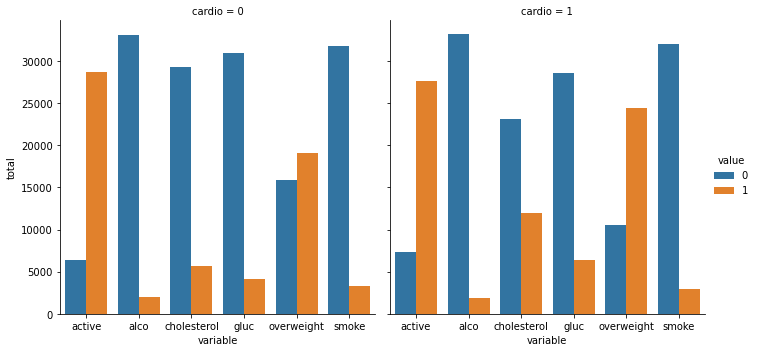

In [6]:
sns.catplot(x = 'variable', y = 'total', col='cardio', hue='value', data = df_cat, kind='bar')

-----------------------------------------
### Selecionando os dados e criando um heatmap de correlação

In [15]:
df = df[df['ap_lo'] <= df['ap_hi']]
df = df[df['height'] >= df['height'].quantile(0.025)]
df = df[df['height'] <= df['height'].quantile(0.975)]
df = df[df['weight'] >= df['weight'].quantile(0.025)]
df = df[df['weight'] <= df['weight'].quantile(0.975)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [16]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002362,0.004124,0.001228,-0.000247,0.003605,0.000616,0.004780,0.002990,-0.001970,-0.001394,0.005071,0.003720,-0.000727
age,0.002362,1.000000,-0.014868,-0.071330,0.070734,0.018077,0.151701,0.127888,0.087119,-0.042994,-0.026529,-0.011512,0.238064,0.087637
gender,0.004124,-0.014868,1.000000,0.504012,0.127957,0.005010,0.062247,-0.035061,-0.020515,0.336598,0.168970,0.008728,0.004280,-0.047820
height,0.001228,-0.071330,0.504012,1.000000,0.246859,0.004572,0.020267,-0.059366,-0.029509,0.186830,0.089081,-0.003492,-0.020771,-0.140151
weight,-0.000247,0.070734,0.127957,0.246859,1.000000,0.026377,0.226771,0.135944,0.105729,0.054296,0.058992,-0.012058,0.168882,0.664217
ap_hi,0.003605,0.018077,0.005010,0.004572,0.026377,1.000000,0.071385,0.022364,0.010944,-0.002000,0.000610,-0.000113,0.049877,0.016801
ap_lo,0.000616,0.151701,0.062247,0.020267,0.226771,0.071385,1.000000,0.149082,0.074526,0.023493,0.033065,0.002699,0.326529,0.170927
cholesterol,0.004780,0.127888,-0.035061,-0.059366,0.135944,0.022364,0.149082,1.000000,0.384649,0.013510,0.038835,0.001846,0.202270,0.126661
gluc,0.002990,0.087119,-0.020515,-0.029509,0.105729,0.010944,0.074526,0.384649,1.000000,-0.003992,0.013368,-0.009841,0.088760,0.087198
smoke,-0.001970,-0.042994,0.336598,0.186830,0.054296,-0.002000,0.023493,0.013510,-0.003992,1.000000,0.342562,0.027921,-0.020220,-0.001134


<AxesSubplot:>

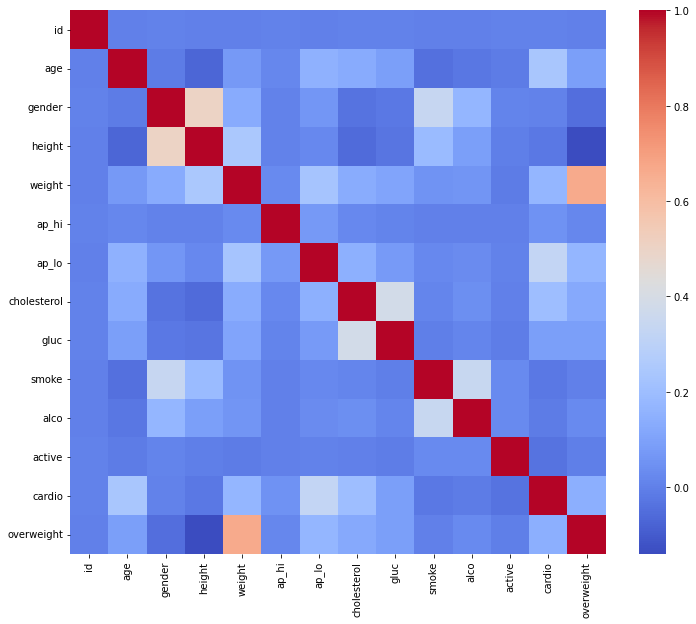

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')